# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15660081055                   -0.60    6.0    657ms
  2   -11.16021332380       -2.44       -1.30    1.0    131ms
  3   -11.16040014893       -3.73       -2.33    2.4    137ms
  4   -11.16041634300       -4.79       -3.20    2.1    126ms
  5   -11.16041703189       -6.16       -3.45    2.4    130ms
  6   -11.16041704559       -7.86       -3.62    1.7    112ms
  7   -11.16041705006       -8.35       -3.96    1.3    110ms
  8   -11.16041705113       -8.97       -4.44    1.4    111ms
  9   -11.16041705142       -9.54       -4.89    2.1    128ms
 10   -11.16041705144      -10.63       -5.20    1.6    114ms
 11   -11.16041705145      -11.47       -5.53    1.7    113ms
 12   -11.16041705145      -11.58       -5.82    1.4    112ms
 13   -11.16041705145      -12.17       -6.12    1.4    111ms


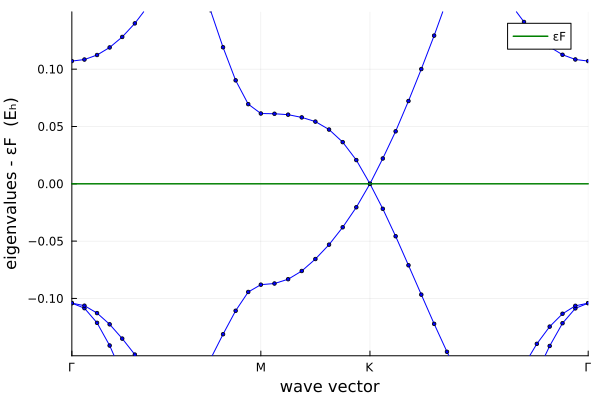

In [1]:
using DFTK
using LinearAlgebra
using Plots
using PseudoPotentialData
using Unitful
using UnitfulAtomic

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, PseudoFamily("cp2k.nc.sr.pbe.v0_1.semicore.gth"))
atoms = [C, C]

# Run SCF
model = model_DFT(lattice, atoms, positions; functionals=PBE(), temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)